# **Data Cleaning and Preprocessing for Linear Regression Modeling**

This notebook will majorly focus on cleaning and preprocessing a data set for linear regession modeling.
The notebook uses dataset that contains data of used cars with other associated variables such as price it was purchased for, the mileage, model, year it was manufactured, engineV, engine type, and body.
The aim is to predict reselling price pof the cars on the basis of these specifications.

In [51]:
# Import required libraries 
import numpy as np
import pandas as pd 
import seaborn as sn 
import statsmodels.api as sma
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import math as m

In [52]:
# loading data 
data = pd.read_csv('Dataset.csv')

In [53]:
# exploring the dataset 

data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [54]:
# To explore catagorical variables 
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


**Identifying Variables**

Brand is an important factor, the more luxury the brand is, the more expensive is the car.

Mileage - The more the car has already been used, the cheaper it would be

Year is also important. Typically, the older the car the cheaper, however, this is not true in the case because there are some vinatge cars as well

Engine is also identifed as one factor to be considered.

These are some of many variables.

In [55]:
# for this model we will not consider model as one of the predictor valiable consider 

data = data.drop(["Model"],axis=1)

In [56]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

**Structuring and CLeaning the data**

In [57]:
# Dropping Missing values because they are less than 5% of the whole dataset 

data = data.dropna(axis=0)

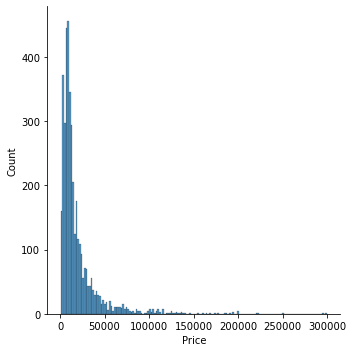

In [58]:
# checking for skewness and outliers of the data 

sn.displot(data['Price'])

It is evident from the graph that there are some outliers in price variable. The outliers are towards the higher price end i.e the right side of the graph. To deal with these outliers we can consider the data that belongs under the 99th percentile.  

In [59]:
Q = data['Price'].quantile(0.99)

In [60]:
data = data[data['Price']<Q]

In [61]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


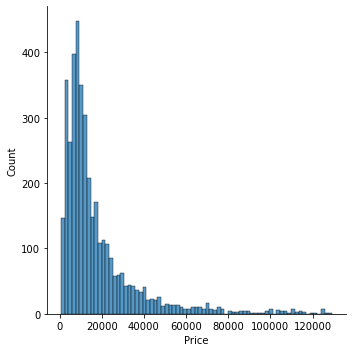

In [62]:
sn.displot(data['Price'])

The number of outliers have reduced. 

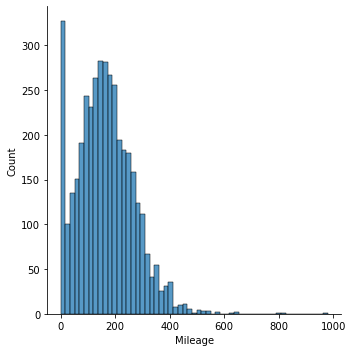

In [63]:
sn.displot(data['Mileage'])

In [64]:
q = data['Mileage'].quantile(0.99)
data = data[data['Mileage']<q]

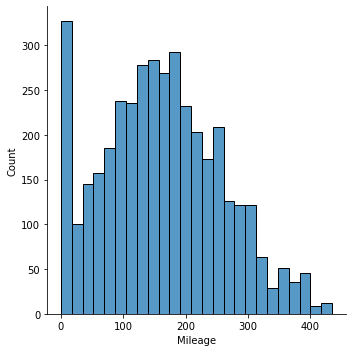

In [65]:
sn.displot(data['Mileage'])

The outliers in the dataset have reduced 

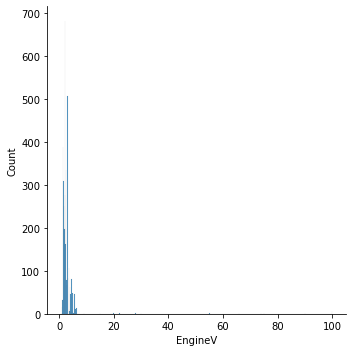

In [66]:
sn.displot(data['EngineV'])

In [67]:
data = data[data['EngineV']<6.5]

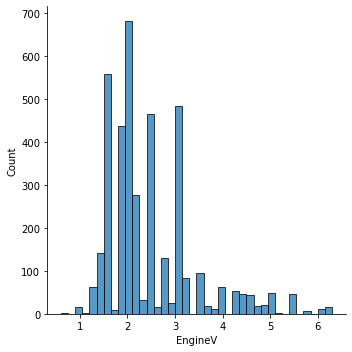

In [68]:
sn.displot(data['EngineV'])

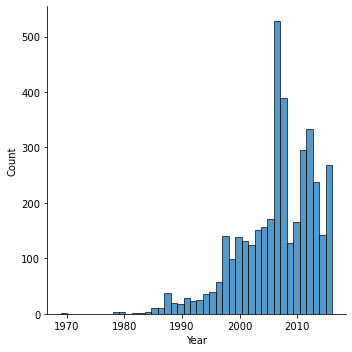

In [69]:
sn.displot(data["Year"])

The outliers in this case is on the left side of the data, therefore we will only take the data that is more than 1% of the whole dataset, essentially take the outliers on left side out 

In [70]:
o = data['Year'].quantile(0.01)
data = data[data['Year']>o]

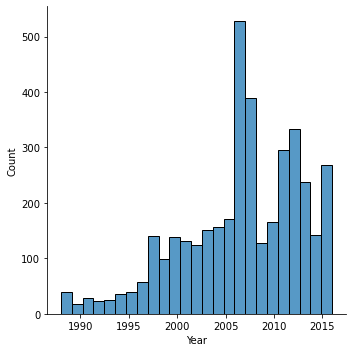

In [71]:
sn.displot(data['Year'])

In [72]:
data = data.reset_index(drop=True)

In [73]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


#### Preprocessing Data for Linear Regression Modeling 

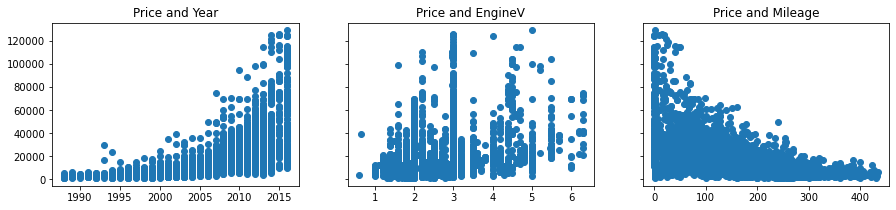

In [74]:
# checking OLS Assumptions 
# checking for linearity of the data 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data['Year'],data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'],data['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data['Mileage'],data['Price'])
ax3.set_title('Price and Mileage')


plt.show()

None of these have linear realtionship, therefore we will, transform one of the variable. Lets look at the price variable again 

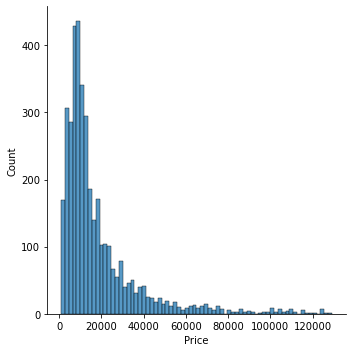

In [75]:
sn.displot(data["Price"])

In [76]:
log_price = np.log(data['Price'])
data['log_price'] = log_price

In [77]:
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Since we'll only be using log of price variable, we can drop the price variable 

In [78]:
data = data.drop(["Price"],axis=1)

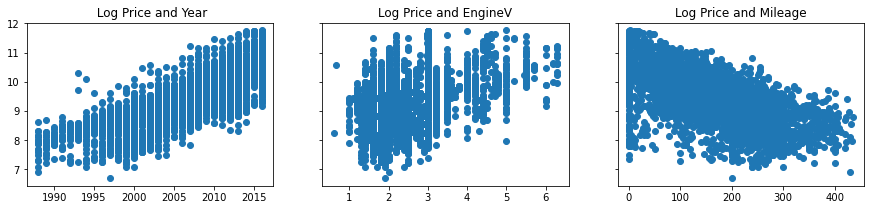

In [79]:
# checking the data again using graph 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data['Year'],data['log_price'])
ax1.set_title(' Log Price and Year')
ax2.scatter(data['EngineV'],data['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data['Mileage'],data['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

Now, a linear pattern in the graph can be seen 

#### Checking for Multicolinearity Assumption

We will use variance inflation factor to test the variables for multicollinearity 

In [80]:
data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [81]:
variables = data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()


vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [82]:
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


Since year has the highest VIF, we will get rid of it and this will also drive enginev's VIF factor down. 

In [83]:
data = data.drop(["Year"],axis=1)

In [84]:
## Creating dummies for catagorical variable 

data = pd.get_dummies(data, drop_first = True)

In [85]:
data

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [86]:
data.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [87]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [88]:
data = data[cols]

In [89]:
data

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Linear Regression

In [90]:
target = data['log_price']

In [91]:
inputs = data.drop(['log_price'], axis = 1)

In [92]:
# scaling the data to normalize it 

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [93]:
inputs_s = scaler.transform(inputs)

In [94]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(inputs_s, target, test_size=0.2, random_state=365)

In [95]:
# creating regression 
reg = LinearRegression()

In [96]:
reg.fit(x_train, y_train)

LinearRegression()

In [97]:
y_pred = reg.predict(x_train)

Text(0, 0.5, 'Predictions (y_hat)')

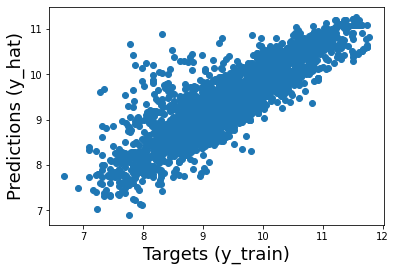

In [98]:
# comparing the target and predictions 

plt.scatter(y_train, y_pred)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)


In [99]:
# finding R-Squared value
reg.score(x_train, y_train)

0.744996578792662

Model explains Approximately 74.49% variability of data 

In [100]:
reg.intercept_

9.415239458021299

In [101]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [102]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [103]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Model Evaluation 

Text(0, 0.5, 'Predictions (y_hat)')

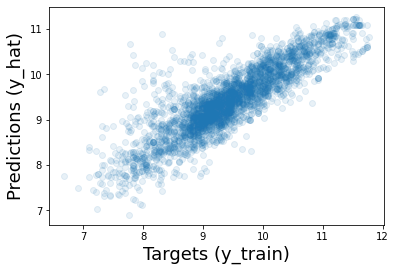

In [104]:
plt.scatter(y_train, y_pred, alpha = 0.1)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)

From the graph it is seen that overall, our model is good at predicting prices of cars, but when seen properly, it can be noticed that our model is better at predicting prices for cars of higher value than for lower value. As seen, the points are scattered and less visible at the end, indicating that predictions are off the target and the density of points on the right side of the graph is better.

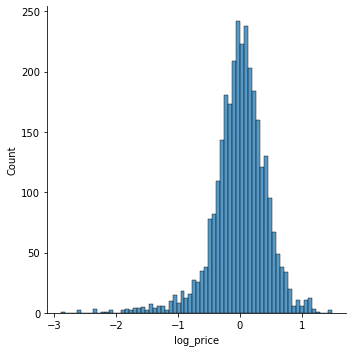

In [105]:
# looking at residual plots 
sn.displot(y_train - y_pred)

The graph is skewed to right, the long tail with values below mean indicates that the model is overestimating the values, but the short tail on the right side indicates that the model rearly underestimates the values 

In [106]:
# checking the prices 
prices = pd.DataFrame(np.exp(y_pred),columns = ['Prediction'])

In [107]:
prices['Target'] = np.exp(y_test)

In [108]:
# Indexing for y_test 
y_test = y_test.reset_index(drop = True)

In [109]:
prices['Target'] = np.exp(y_test)

In [172]:
prices

,Prediction,Target
0,12525.132104,13000.0
1,11374.719466,6300.0
2,3151.233047,111999.0
3,8143.830036,22600.0
4,32315.928662,27000.0
...,...,...
3107,4089.991906,NaN
3108,6936.030875,NaN
3109,11514.047934,NaN
3110,20000.235766,NaN


In [163]:
prices['Difference'] = prices['Target'] - prices ['Prediction']

In [164]:
pd.options.display.max_rows = 999
prices

,Prediction,Target,Difference
0,12525.132104,13000.0,474.867896
1,11374.719466,6300.0,-5074.719466
2,3151.233047,111999.0,108847.766953
3,8143.830036,22600.0,14456.169964
4,32315.928662,27000.0,-5315.928662
...,...,...,...
3107,4089.991906,NaN,NaN
3108,6936.030875,NaN,NaN
3109,11514.047934,NaN,NaN
3110,20000.235766,NaN,NaN


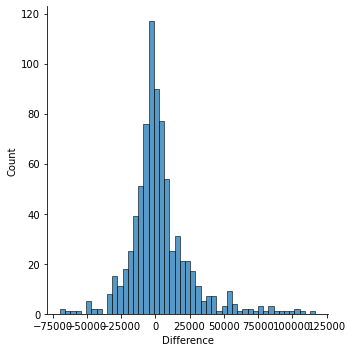

In [165]:
sn.displot(prices['Difference'])

In [167]:
# % differnece 

prices['Difference%'] = np.absolute(prices['Difference']/prices['Target']*100)
prices.head()

,Prediction,Target,Difference,Difference%
0,12525.132104,13000.0,474.867896,3.652830
1,11374.719466,6300.0,-5074.719466,80.551103
2,3151.233047,111999.0,108847.766953,97.186374
3,8143.830036,22600.0,14456.169964,63.965354
4,32315.928662,27000.0,-5315.928662,19.688625


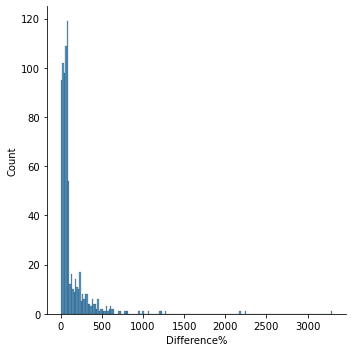

In [169]:
sn.displot(prices['Difference%'])

# Takeaways 

From the qunatiles it can be seen that the predictions made by the model were fairly close. The minimum difference is 0.2% However, the maximum difference is too large. Indicating that the models predictions were a bit off. Furthermore, mosr of the difference is in negative vvalues, it can mean many thing, such as the difference is also because some of the other variables which were not taken into consideration like the Model of the car. This is Certainly not the best model, however, there are ways to make it better.